# IO

In [1]:
import PineBioML.IO as IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "example_data.xlsx", index_col=0)

##### pick the target label column
y = data["y"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("y", axis = 1)

In [4]:
##### Read data method 2: read multiple files
x, y = IO.read_multiple_groups(
    file_path_list=[
        input_folder+ "example_group1.csv", # all samples from this file will have y = 0, because it is in the 1st place of the file path list.
        input_folder+ "example_group2.tsv", # all samples from this file will have y = 1, because it is in the 2nd place of the file path list.
    ],
    index_col=0
    )

# Train test split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Modeling

In [6]:
from PineBioML.preprocessing import Normalizer
from PineBioML.preprocessing import impute
from PineBioML.selection.ensemble import selector
import PineBioML.model.supervised.Classification as tuner

from sklearn.pipeline import Pipeline

In [7]:
pipe = Pipeline(
    [
        ("Standarization", Normalizer(method="StandardScaler")),
        ("Missing_Value_Processing", impute.simple_imputer(threshold = 0.6, strategy = "constant")),
        ("Sample_Selection", selector()),
        ("Modeling", tuner.RandomForest_tuner(target="roc_auc"))
     ]
)

In [8]:
pipe.fit(x_train, y_train)

Using  c45  to select.


100%|██████████| 100/100 [00:00<00:00, 438.55it/s]
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:    0.9s finished


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.
multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Info] Number of positive: 67, number of negative: 67
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4640
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('Standarization',
                 <PineBioML.preprocessing.Normalizer object at 0x000002C40FAA4610>),
                ('Missing_Value_Processing',
                 <PineBioML.preprocessing.impute.simple_imputer object at 0x000002C40FAA49A0>),
                ('Sample_Selection',
                 <PineBioML.selection.ensemble.selector object at 0x000002C40FAA46A0>),
                ('Modeling',
                 <PineBioML.model.supervised.Classification.RandomForest_tuner object at 0x000002C4696ADB80>)])

# Evaluation


 
              precision    recall  f1-score   support

         0.0       0.77      0.52      0.62        33
         1.0       0.64      0.85      0.73        33

    accuracy                           0.68        66
   macro avg       0.70      0.68      0.67        66
weighted avg       0.70      0.68      0.67        66

sensitivity: 0.848
specificity: 0.515


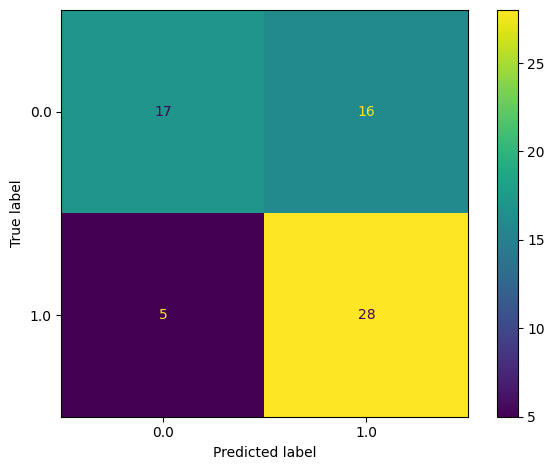

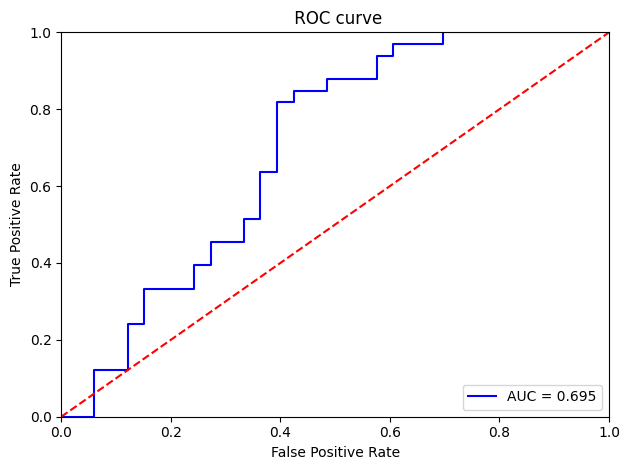

In [9]:
from PineBioML.report.utils import classification_summary

classification_summary( y_valid, pipe.predict_proba(x_valid)[:, 1])

# Saving Model

In [14]:
# save model
IO.save_model(pipe, output_folder+"models/", export_title+"MostInOne", overide=True)

example_basic MostInOne  has already exist in  ./output/models/
It will be overide.


# Reload model

In [15]:
# load model
presaved_model = IO.load_model(output_folder+"models/", export_title+"MostInOne")

In [16]:
# prediction
presaved_model.predict(x_valid)

25    1.0
66    1.0
26    1.0
53    1.0
75    1.0
     ... 
0     1.0
52    1.0
17    0.0
13    1.0
79    1.0
Length: 66, dtype: float64


 
              precision    recall  f1-score   support

         0.0       0.77      0.52      0.62        33
         1.0       0.64      0.85      0.73        33

    accuracy                           0.68        66
   macro avg       0.70      0.68      0.67        66
weighted avg       0.70      0.68      0.67        66

sensitivity: 0.848
specificity: 0.515


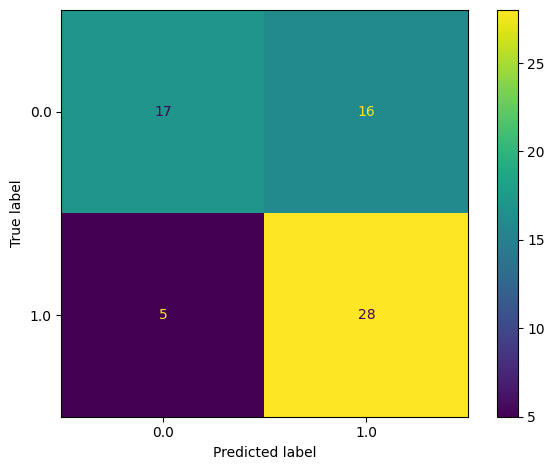

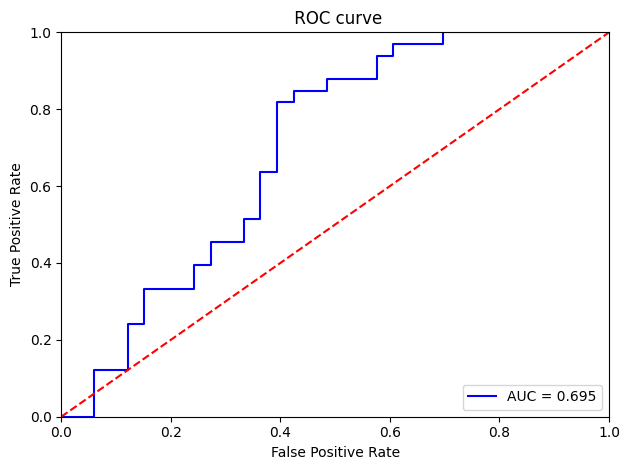

In [17]:
classification_summary(y_valid, presaved_model.predict_proba(x_valid)[:, 1]) 